<a href="https://colab.research.google.com/github/audrey-fontana/Ciencia_Dados/blob/main/Analise_Dados_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 2 - Resolvendo um problema de varejo

In [ ]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns

In [ ]:
# Importando a primeira base de dados

vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
# Verificando as informações da base de dados

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Observe que as colunas de "Preço" e "estado" possuem dados nulos que precisam ser tratados posteriormente.

In [ ]:
# Agrupando o canal de vendas e verificando quantos dados cada canal possui

vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


Observe que os canais de vendas "APP" e "Aplicativo" significam a mesma coisa, então podemos alterar tudo o que for "APP" por "Aplicativo".

Para isso vamos usar a função .replace

In [ ]:
# Alterando "APP" por "Aplicativo" e verificando

vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [ ]:
# Verificando a "bandeira"

vendas.groupby("bandeira").idcompra.nunique()

,idcompra
bandeira,
A,27679
B,38483


In [ ]:
# Verificando o "nome departamento"

vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


Observe que por boas práticas é interessante que todos os nome de colunas ou linhas sejam separados por "_" e não contenham espaçamento entre as palavras.

Vamos substituir todos os espaços.

In [ ]:
# Substituindo todas as linhas de uma única vez e verificando

vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [ ]:
# Verificando o "estado"

vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


Agora vamos substituir os valores nulos da coluna de estado.

Como premissa do exercício, a base de dados está com problema e todos os valores de "estado" que estiverem nulos devem conter o valor de "MS"

In [ ]:
# Chamando as linhas do banco de dados que contém valores nulos na coluna de "estado"

vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
# Criando uma variável que seja o banco de dados excluíndo todas as linhas com valores nulos.

vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


Observe que para o caso acima, o valor total de linhas diminuiu, pois excluimos os dados nulos.

In [ ]:
# Substituindo os valores nulos de "estado" por "MS", conforme preconizado no exercício

vendas["estado"] = vendas["estado"].fillna("MS")
vendas["estado"].fillna("MS", inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-12-aa9a2e8c5514>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["estado"].fillna("MS", inplace = True)


In [ ]:
# Substituindo os valores nulos de preço pela média calculada da variável preço

# Calculando a média
media_preço = vendas["Preço"].mean()

# Substituindo os valores nulos
vendas["Preço"].fillna(media_preço, inplace = True)

# Verificando
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-13-8d942e7cd679>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["Preço"].fillna(media_preço, inplace = True)


Observe que após as substituições dos valores nulos, todas as colunas possuem a mesma quantidade de dados.

In [ ]:
# Verificando qual é o valor da média

media_preço

906.5891285439033

Verificando as linhas que possuem valor de "Preço" menor do que "Preço_com_frete".

Os dados em que o preço for menor do que o preço com frete devem ser desconsiderados da análise, pois representam algum tipo de erro.

In [ ]:
# Verificando as informações das duas variáveis

vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


Podemos seguir por dois caminhos.

O primeiro é criar uma variável de preço incorreto, filtrando os dados em que o preço é maior do que o preço com frete.

E o segundo é criar uma variável de preço correto, filtrando os dados em que o preço é menor do que o preço com frete.

In [ ]:
# Filtrando pelo primeiro método

preço_errado = vendas.query("Preço > Preço_com_frete")

# Filtrando pelo segundo método

vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


In [ ]:
# Verificando os dados da nova variável, com o filtro aplicado

vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [ ]:
# Exemplo de filtro da variável nova: departamento esperte e lazer E estado SP

vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


ANÁLISE DOS DADOS:

1 - Verificando os departamentos com maior número de vendas.

a - Agrupar os dados de departamento a partir dos valores únicos da variável de id de compra. Desse modo tempos o somatório das linhas da variável de departamento.

In [ ]:
# Realizando agrupamento dos departamentos

vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending = False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


2 - Verificar a média do vlaor total das vendas (preço com frete) para cada departamento.

a - Realizar o arredondamento dos valores para duas casas decimais.

In [ ]:
# Agrupando a média do preço com frente para cada departamento e, arredondando os valores para duas casas decimais

round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False).reset_index(), 2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


3 - Verificar o total de vendas por data

Perceba que no exemplo abaixo, o agrupamento ocorreu para cada dia de venda.

In [ ]:
# Agrupando o total de vendas por data

vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending = False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


Para agrupar as vendas por mês, é necessário criar uma nova coluna que busque o resultado do mês dentro da informação de data.

In [ ]:
# Criando uma coluna nova que contenha a informação de mês e, verificando os dados

vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-41-7c8346fa716f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [ ]:
# Agrupando os dados de vendas por mês

vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending = False).reset_index()

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


Realizar o join de dois bancos de dados

In [ ]:
# importando o segundo banco de dados

cliente = pd.read_excel("/content/cliente_varejo.xlsx")

# Verificando as variáveis contidas no segundo banco de dados

cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
# Analisando quais variáveis se conectam entre os bancos de dados

vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


Observe que ambos os bancos de dados possuem a variável de cliente_Log, portando podemos juntar esses dois bancos de dados a partir desse parâmetro.

Primeiro vamos analisar se o segundo banco de dados precisa de algum tratamento de dados antes de fazermos a junção dos bancos.

In [ ]:
# Verificando o comportamento dos dados do banco de dados de clientes

cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
# Verificando se o banco de dados de clientes possuí algum valor nulo

cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


Observe que não há nenhum valor nulo que precisa ser filtrado ou removido.

Entretando, a variável de renda pode conter valores não inteiros, de modo que devemos alterar o tipo de dado de int para float.

In [ ]:
# Alterando o tipo de dado de renda

cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


Com os dados tratados, pode-se fazer a junção dos dois bancos de dados.

Essa junção tem a mesma função de "procv" no excel, onde as informações de uma tabela é puxada para outra a partir de uma chave em comum.

In [ ]:
# Criando uma nova variável que representa a junção dos dois bancos de dados

vendas_cliente = vendas_correto.merge(cliente, how = "left", on = "cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


4 - Verificar a renda média dos clientes por cada canal de venda.

a - Para isso, devemos agrupar os canais de vendas a partir da média do valor de renda.

In [ ]:
# Realizando o agrupamento

agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending = False).reset_index(), 2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


5 - Verificar a média de idade dos clientes para o tipo de bandeira utilizada

In [ ]:
# Realizando o agrupamento

agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending = False).reset_index(), 2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


Criar gráficos com as métricas utilizando a biblioteca matplotlib

In [ ]:
# Importando a biblioteca

import matplotlib.pyplot as plt


Criar um gráfico de barras da idade média por bandeira

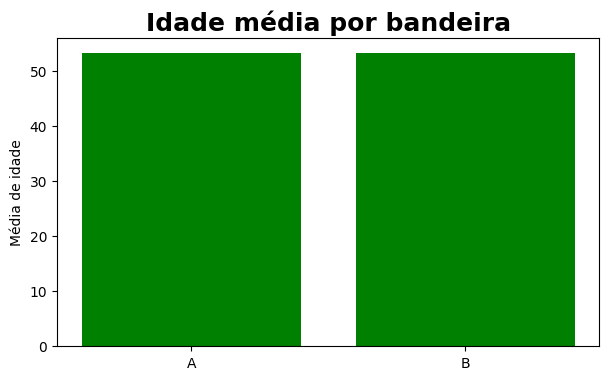

In [ ]:
# Criando o gráfico

# Tamanho da imagem
fig = plt.figure(figsize = (7, 4))

# Gráfico de barras; eixo x e eixo y; cor
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color = "green")

# Texto do eixo y
plt.ylabel("Média de idade")

# Características de edição do título: texto, localização, tamanho de fonte, negrito, cor
plt.title("Idade média por bandeira", loc = "center", fontsize = 18, fontweight = "bold", color = "black");

Criar um gráfico de barras da renda média por canal de vendas

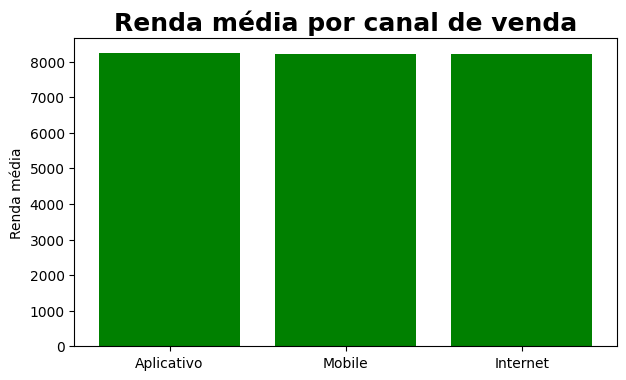

In [ ]:
# Criando o gráfico de barras

fig = plt.figure(figsize = (7, 4))
plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color = "green")
plt.ylabel("Renda média")
plt.title("Renda média por canal de venda", loc = "center", fontsize = 18, fontweight = "bold", color = "black");

Criar um gráfico de linhas da data de venda pela quantidade de venda

a - Denominar a variável a partir do agrupamento desejado
b - Plotar o gráfico de linhas a partir da variável criada

In [ ]:
# Criando uma variável aplicando o agrupamento de vendas por data

venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


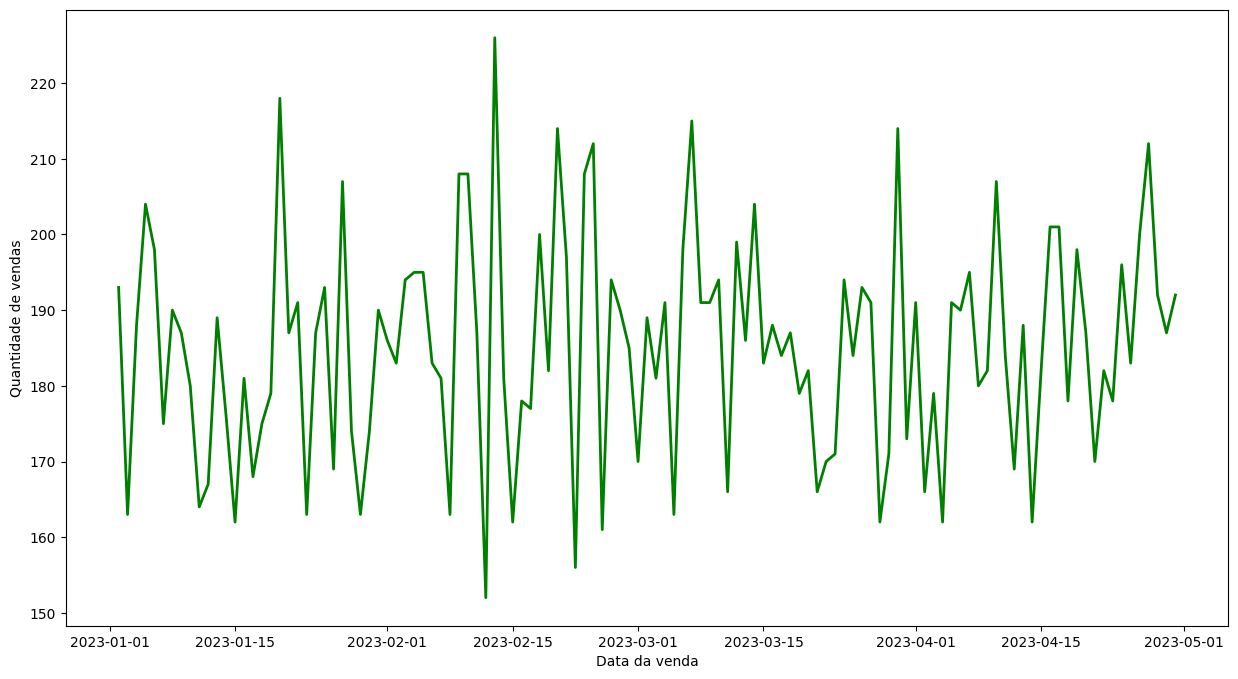

In [ ]:
# Criando o gráfico

# Determinando o tamanho da figuta
fig = plt.figure(figsize = (15, 8))

# Colocando as informações de título de cada eixo
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")

# Declarando as variáveis x e y
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

# Plotando e exibindo o gráfico
plt.plot(x, y, color = "green", linewidth = "2")
plt.show()

Perceba que as variáveis podem ser declaradas antes de plotar o gráfico, conforme exemplo acima.

Plotar um gráfico de barras de média de vendas por departamento

a - Declarar uma variável com o agrupamento correto
b - Plotar o gráfico

In [ ]:
# Definindo uma nova variável com o agrupamento de média de vendas por departamento

agg_dept_preço = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_dept_preço

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


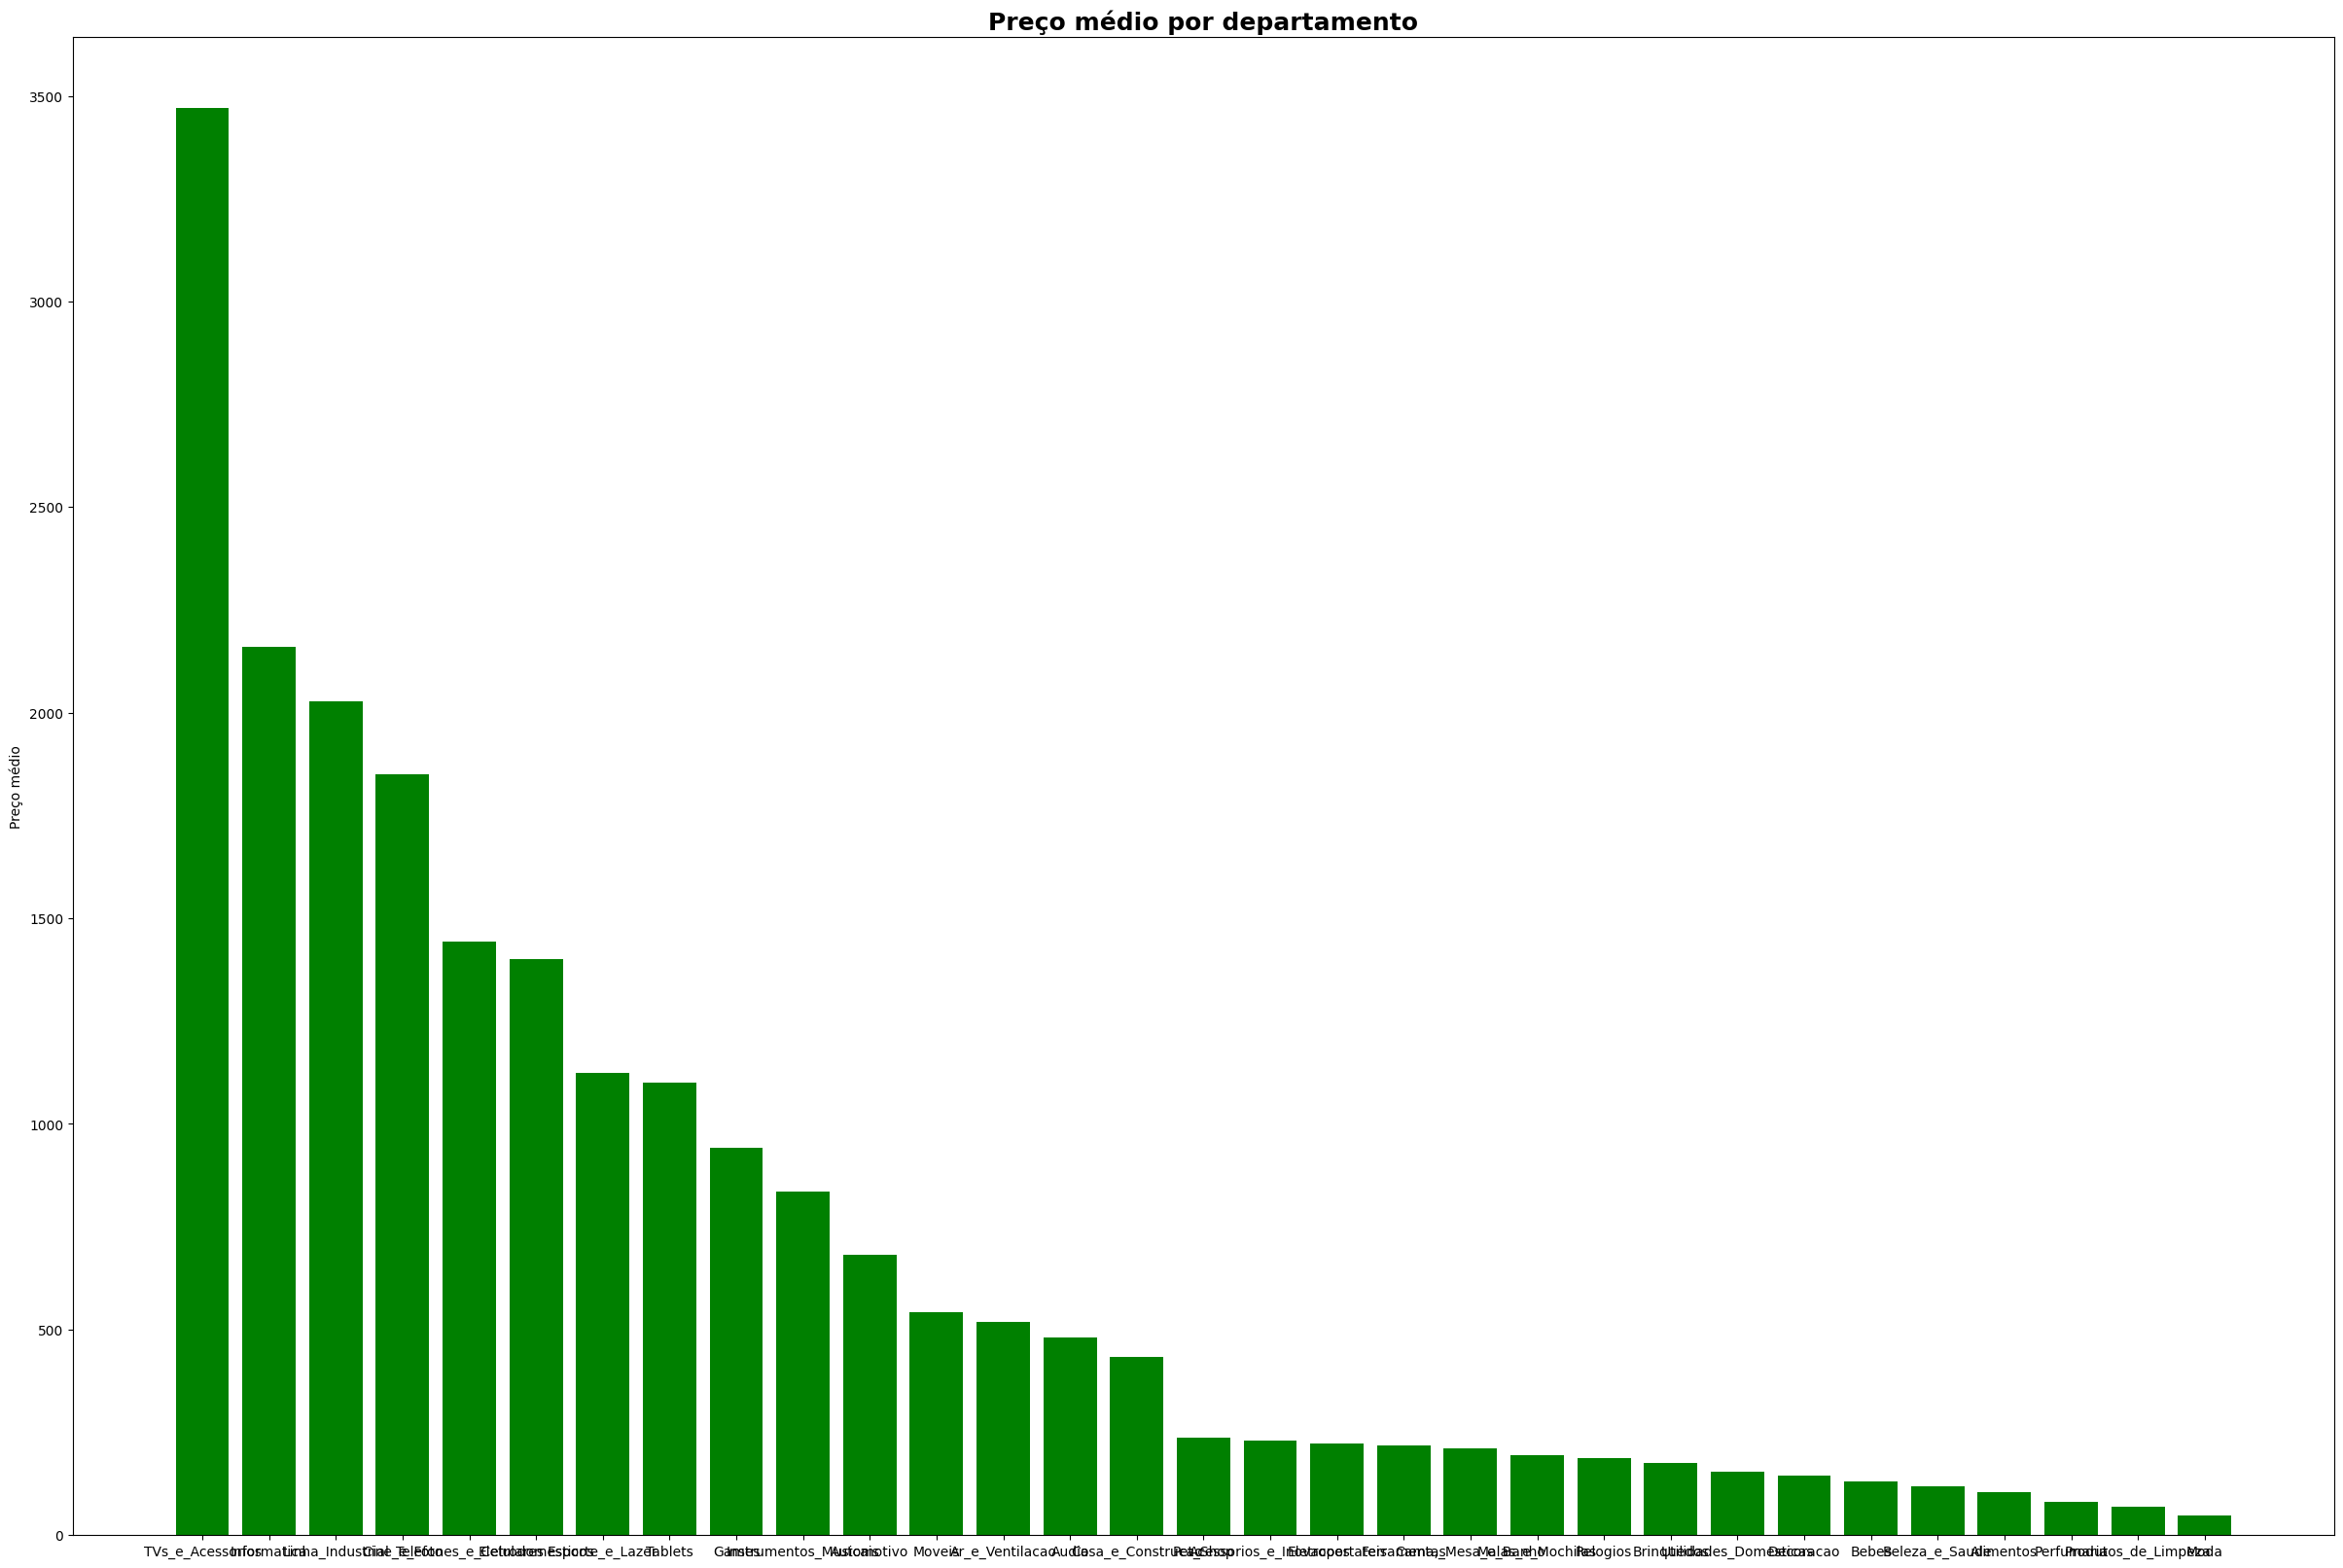

In [ ]:
# Plotando o gráfico de barras

fig = plt.figure(figsize = (30, 20))
plt.bar(agg_dept_preço["Nome_Departamento"], agg_dept_preço["Preço_com_frete"], color = "green")
plt.ylabel("Preço médio")
plt.title("Preço médio por departamento", loc = "center", fontsize = 18, fontweight = "bold", color = "black");

Criar os mesmos gráficos com outra biblioteca: plotly, que possuí gráficos interativos e uma visualização mais inteligente.

Os gráficos criados podem ser salvos como png; pode ser dado zoom nos gráficos para melhor visualização de um pedaço do gráfico.

Como essa biblioteca não é nativa do python, é necessário intalar.

In [ ]:
# Realizando a instalação das bibliotecas

%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Realizando a importação das bibliotecas

import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Criando gráfico de battas da bandeira por idade

px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [ ]:
# Criando gráfico de linhas de compra por data

px.line(venda_por_data, x = "Data", y = "idcompra")

In [ ]:
# Criando gráfico de barras de preço de venda por departamento

px.bar(agg_dept_preço, x = "Nome_Departamento", y = "Preço_com_frete")